# Humana Healthcare Analytics Code

In [1]:
#import packages
# author- Akash Gandhi
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
#load dataset
df=pd.read_csv(r"C:\Users\gandh\Downloads\Datasets\humana\TAMU_FINAL_DATASET_2018\TAMU_FINAL_DATASET_2018.csv")

In [3]:
df.shape

(100000, 448)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [5]:
df.head(1)

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe()

,ID,AGE,AMI_FLAG,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,CON_VISIT_04_Q01,CON_VISIT_04_Q02,CON_VISIT_04_Q03,CON_VISIT_04_Q04,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
count,100000.000000,100000.000000,100000.000000,99970.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000
mean,50000.500000,72.770440,0.027260,0.289367,1.138959,1.028531,0.44411,0.446700,0.448490,0.446560,...,0.520610,0.160920,0.027480,0.012910,0.131820,0.389160,0.369960,0.46998,0.16429,0.464400
std,28867.657797,9.715514,0.162841,0.455188,0.946879,0.758254,1.34770,1.315118,1.392324,1.379421,...,0.499578,0.367459,0.163478,0.112887,0.338297,0.487562,0.482796,0.49910,0.37054,0.498734
min,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,25000.750000,68.000000,0.000000,0.000000,0.522000,0.570000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
50%,50000.500000,73.000000,0.000000,0.000000,0.862000,0.891000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
75%,75000.250000,79.000000,0.000000,1.000000,1.414000,1.306000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.00000,1.000000
max,100000.000000,95.000000,1.000000,3.000000,15.120000,15.704000,88.00000,70.000000,52.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000


In [7]:
#list of columns that contain null values
l=df.columns[df.isna().any()].tolist()

In [8]:
#Creating a dictionary to identify Column names as keys and number of null values in the column as the corresponding value
d={}
for i in l:
    d[i]=len(df[df[i].isnull()])

In [9]:
d

{'SEX_CD': 30,
 'ESRD_IND': 32,
 'HOSPICE_IND': 32,
 'ORIG_REAS_ENTITLE_CD': 30,
 'PCP_ASSIGNMENT': 157,
 'DUAL': 30,
 'INSTITUTIONAL': 30,
 'LIS': 30,
 'MCO_HLVL_PLAN_CD': 33,
 'MCO_PROD_TYPE_CD': 33,
 'Diab_Type': 64693,
 'Dwelling_Type': 12179,
 'Education_level': 12179,
 'Length_residence': 12179,
 'Est_BMI_decile': 12179,
 'Num_person_household': 12179,
 'College': 12179,
 'Online_purchaser': 12179,
 'Online_User': 12179,
 'Pct_above_poverty_line': 12179,
 'Pct_below_poverty_line': 12179,
 'Decile_struggle_Med_lang': 25215,
 'Home_value': 12179,
 'Est_Net_worth': 12179,
 'Est_income': 12179,
 'Index_Health_ins_engage': 12179,
 'Index_Health_ins_influence': 12179,
 'Population_density_centile_ST': 12179,
 'Population_density_centile_US': 12179}

In [10]:
df.get_dtype_counts()

float64     20
int64      417
object      11
dtype: int64

In [11]:
d

{'SEX_CD': 30,
 'ESRD_IND': 32,
 'HOSPICE_IND': 32,
 'ORIG_REAS_ENTITLE_CD': 30,
 'PCP_ASSIGNMENT': 157,
 'DUAL': 30,
 'INSTITUTIONAL': 30,
 'LIS': 30,
 'MCO_HLVL_PLAN_CD': 33,
 'MCO_PROD_TYPE_CD': 33,
 'Diab_Type': 64693,
 'Dwelling_Type': 12179,
 'Education_level': 12179,
 'Length_residence': 12179,
 'Est_BMI_decile': 12179,
 'Num_person_household': 12179,
 'College': 12179,
 'Online_purchaser': 12179,
 'Online_User': 12179,
 'Pct_above_poverty_line': 12179,
 'Pct_below_poverty_line': 12179,
 'Decile_struggle_Med_lang': 25215,
 'Home_value': 12179,
 'Est_Net_worth': 12179,
 'Est_income': 12179,
 'Index_Health_ins_engage': 12179,
 'Index_Health_ins_influence': 12179,
 'Population_density_centile_ST': 12179,
 'Population_density_centile_US': 12179}

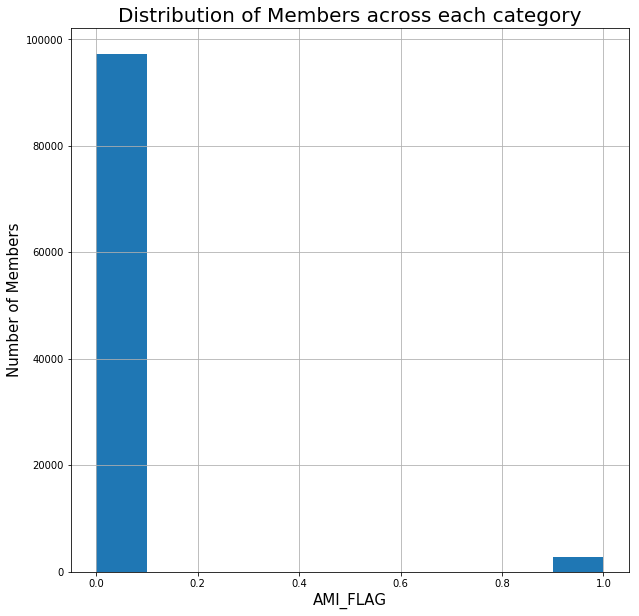

In [12]:
#Histogram for various target categories
df['AMI_FLAG'].hist(bins=10,figsize=(10,10))
plt.xlabel("AMI_FLAG",fontsize=15)
plt.ylabel("Number of Members",fontsize=15)
plt.title("Distribution of Members across each category",fontsize=20)
plt.savefig("C:\\Users\\gandh\\Downloads\\Datasets\\humana\\graphs\\imbalanced.png")

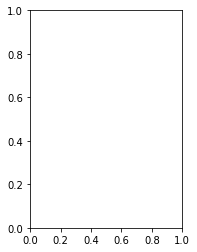

In [13]:

plt.subplot(1,2,1)

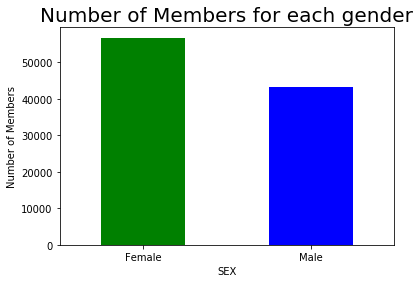

In [14]:
#Plot for Male and female count for humana members
fig,ax=plt.subplots()
df.groupby('SEX_CD').count()['ID'].plot(kind='bar',width=0.5,color=("Green","blue"))
plt.xlabel("SEX",fontsize=10)
plt.ylabel("Number of Members",fontsize=10)
plt.xticks(rotation=0)
ax.set_xticklabels(["Female","Male"])
plt.title("Number of Members for each gender",fontsize=20)
plt.savefig("C:\\Users\\gandh\\Downloads\\Datasets\\humana\\graphs\\gender.png")
#df.groupby(['SEX_CD','AMI_FLAG']).count()['ID'].plot.bar()

In [15]:
#Ratio of females to Males who suffered heart attacks
df[df['AMI_FLAG']==1].groupby('SEX_CD').count()['ID'][0]/(df[df['AMI_FLAG']==1].groupby('SEX_CD').count()['ID'][0]+df[df['AMI_FLAG']==1].groupby('SEX_CD').count()['ID'][1])

0.4744766801322071

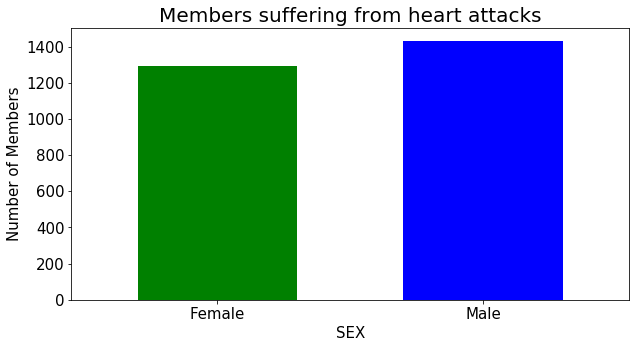

In [16]:
#plt.subplot(1,2,2)
fig, ax = plt.subplots()
df[df['AMI_FLAG']==1].groupby('SEX_CD').count()['ID'].plot(kind='bar',figsize=(10,5),color=("green","blue"),width=0.6,ax=ax,label='SEX_CD')
plt.xlabel("SEX",fontsize=15)
plt.ylabel("Number of Members",fontsize=15)
plt.title("Members suffering from heart attacks",fontsize=20)
plt.xticks(rotation=0,color=("black"),fontsize=15)
plt.yticks(fontsize=15)
#ax.legend(["Female","Male"])
ax.set_xticklabels(["Female","Male"])
#ax.legend(["Male"])
plt.savefig("C:\\Users\\gandh\\Downloads\\Datasets\\humana\\graphs\\genderwithAMI.png")

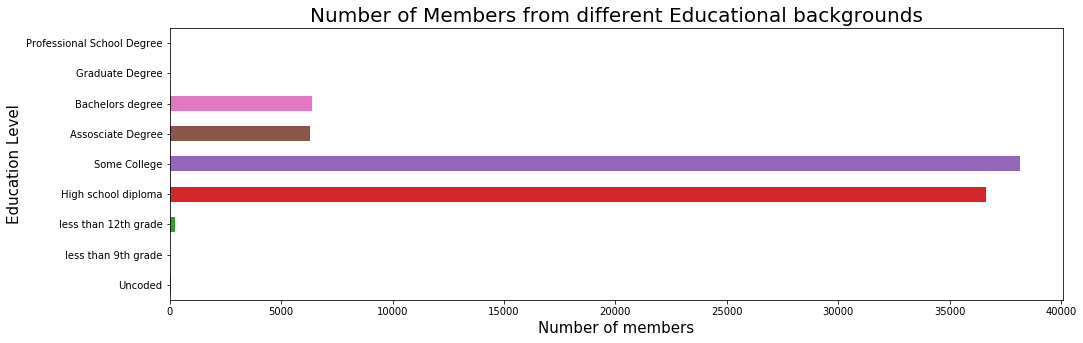

In [17]:
fig,ax=plt.subplots()
df.groupby('Education_level').count()['ID'].plot(kind='barh',figsize=(16,5))
plt.ylabel("Education Level",fontsize=15)
plt.xlabel("Number of members",fontsize=15)
plt.title("Number of Members from different Educational backgrounds",fontsize=20)
plt.xticks(rotation=0)
ax.set_yticklabels(["Uncoded","less than 9th grade","less than 12th grade","High school diploma","Some College","Assosciate Degree","Bachelors degree","Graduate Degree","Professional School Degree"])

#plt.show()
plt.savefig("C:\\Users\\gandh\\Downloads\\Datasets\\humana\\graphs\\Educational_background.png")

In [18]:
df['Education_level'].value_counts()

4.0    38156
3.0    36629
6.0     6391
5.0     6304
2.0      236
0.0       69
7.0       23
1.0       12
8.0        1
Name: Education_level, dtype: int64

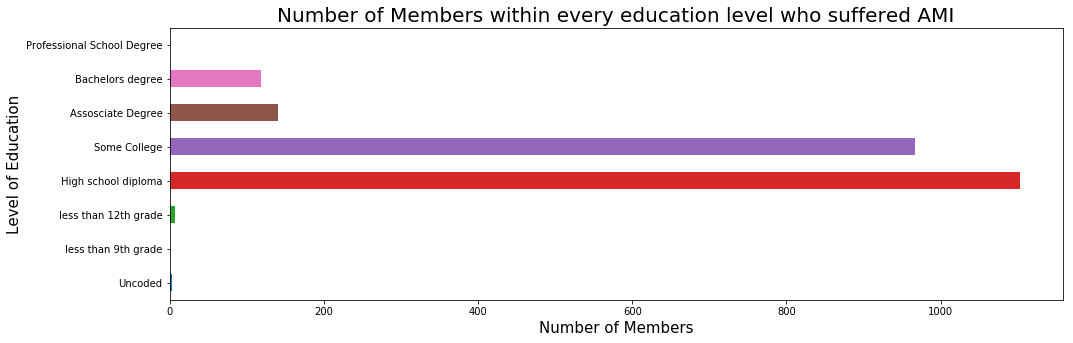

In [19]:
fig,ax=plt.subplots()
df[df['AMI_FLAG']==1].groupby('Education_level').count()['ID'].plot(kind='barh',figsize=(16,5))
plt.ylabel("Level of Education",fontsize=15)
plt.yticks(rotation=0)
plt.xlabel("Number of Members",fontsize=15)
plt.title("Number of Members within every education level who suffered AMI",fontsize=20)
ax.set_yticklabels(["Uncoded","less than 9th grade","less than 12th grade","High school diploma","Some College","Assosciate Degree","Bachelors degree","Professional School Degree"])
#plt.show()
plt.savefig("C:\\Users\\gandh\\Downloads\\Datasets\\humana\\graphs\\Educational_background_AMI.png")

In [20]:
df['AMI_FLAG'].value_counts()

0    97274
1     2726
Name: AMI_FLAG, dtype: int64

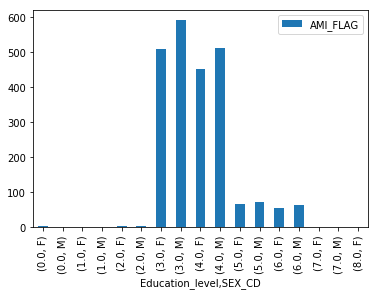

In [21]:
pd.pivot_table(df,index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)



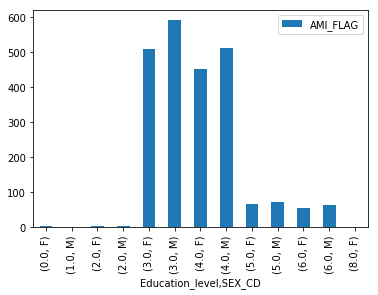

In [22]:
pd.pivot_table(df[df['AMI_FLAG']==1],index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)


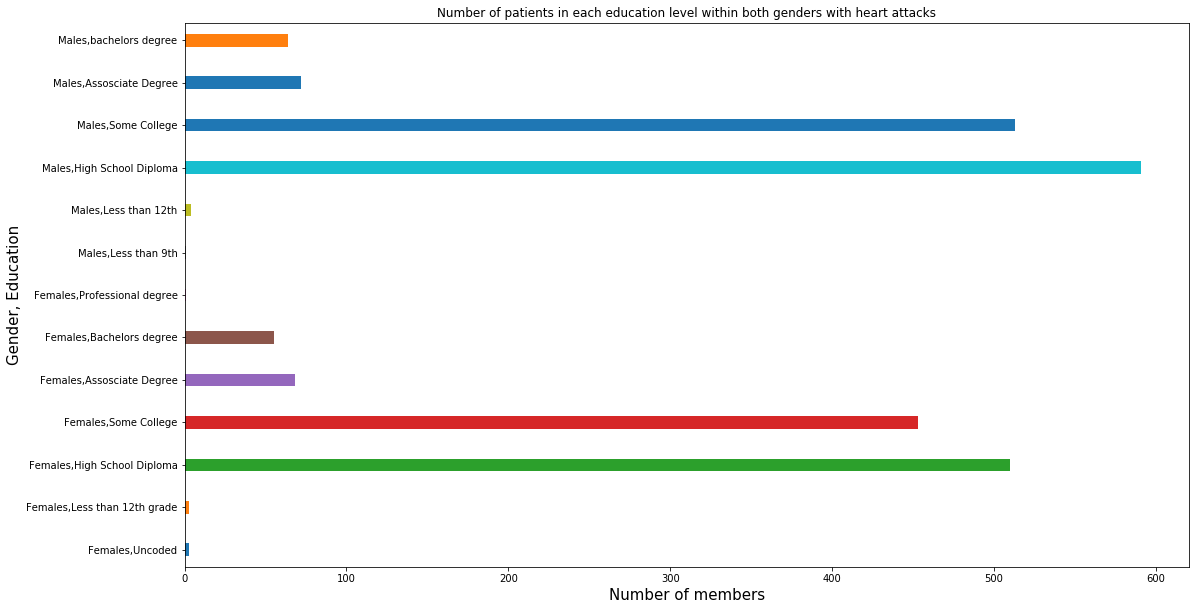

In [23]:
fig,ax=plt.subplots()
df[df['AMI_FLAG']==1].groupby(['SEX_CD','Education_level']).count()['AMI_FLAG'].plot(kind='barh',stacked=True,width=0.3,figsize=(18,10))
plt.ylabel("Gender, Education",fontsize=15)
plt.xticks(rotation=0)
plt.xlabel("Number of members",fontsize=15)
plt.yticks(rotation=0)
plt.title("Number of patients in each education level within both genders with heart attacks")
ax.set_yticklabels(['Females,Uncoded','Females,Less than 12th grade','Females,High School Diploma','Females,Some College','Females,Assosciate Degree','Females,Bachelors degree','Females,Professional degree','Males,Less than 9th','Males,Less than 12th','Males,High School Diploma','Males,Some College','Males,Assosciate Degree','Males,bachelors degree'])
plt.savefig('C:\\Users\\gandh\\Downloads\\Datasets\\humana\\graphs\\GENDER_EDUCATION_AMI.png')
#plt.show()

In [24]:
l=list(d.keys())

In [25]:
d

{'SEX_CD': 30,
 'ESRD_IND': 32,
 'HOSPICE_IND': 32,
 'ORIG_REAS_ENTITLE_CD': 30,
 'PCP_ASSIGNMENT': 157,
 'DUAL': 30,
 'INSTITUTIONAL': 30,
 'LIS': 30,
 'MCO_HLVL_PLAN_CD': 33,
 'MCO_PROD_TYPE_CD': 33,
 'Diab_Type': 64693,
 'Dwelling_Type': 12179,
 'Education_level': 12179,
 'Length_residence': 12179,
 'Est_BMI_decile': 12179,
 'Num_person_household': 12179,
 'College': 12179,
 'Online_purchaser': 12179,
 'Online_User': 12179,
 'Pct_above_poverty_line': 12179,
 'Pct_below_poverty_line': 12179,
 'Decile_struggle_Med_lang': 25215,
 'Home_value': 12179,
 'Est_Net_worth': 12179,
 'Est_income': 12179,
 'Index_Health_ins_engage': 12179,
 'Index_Health_ins_influence': 12179,
 'Population_density_centile_ST': 12179,
 'Population_density_centile_US': 12179}

In [26]:
df.shape

(100000, 448)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [28]:
df.head()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0
1,2,49,F,0,N,N,1.0,2.879,1.159,ATTRIBUTED,...,0,0,0,0,0,0,1,0,0,1
2,3,75,F,0,N,N,0.0,0.638,0.568,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
3,4,68,M,0,N,N,0.0,0.584,0.886,MEMBER SELECTED,...,1,1,0,0,1,1,1,1,1,1
4,5,81,F,0,N,N,1.0,1.242,1.212,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Identifying number of unique values in each columns
k={}
for i in df.columns:
    k[i]=df[i].nunique()

In [30]:
df.groupby('RX_THER_01_YR2016').count()['ID']

RX_THER_01_YR2016
0     81575
1     12727
2      3770
3      1150
4       410
5       185
6        79
7        35
8        25
9        15
10        9
11        6
12        4
13        4
14        1
15        1
16        2
20        1
22        1
Name: ID, dtype: int64

In [31]:
df.groupby('ORIG_REAS_ENTITLE_CD').count()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,DUAL,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
ORIG_REAS_ENTITLE_CD,,,,,,,,,,,,,,,,,,,,,
0.0,71114,71114,71114,71114,71112,71112,71114,71114,71031,71114,...,71114,71114,71114,71114,71114,71114,71114,71114,71114,71114
1.0,28790,28790,28790,28790,28790,28790,28790,28790,28747,28790,...,28790,28790,28790,28790,28790,28790,28790,28790,28790,28790
2.0,60,60,60,60,60,60,60,60,59,60,...,60,60,60,60,60,60,60,60,60,60
3.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


Text(0.5,1,'Age dependency on heart attacks')

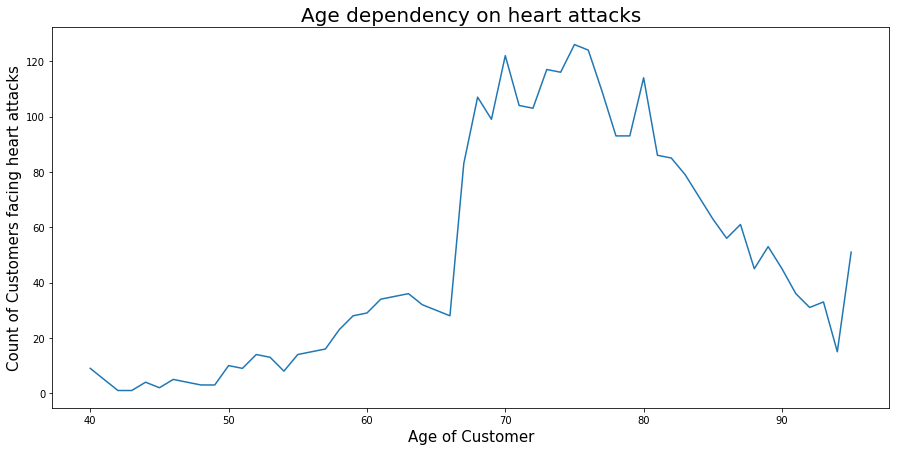

In [32]:
#Age Vs Heart attacks relationships
fig,ax=plt.subplots()
df[df['AMI_FLAG']==1].groupby('AGE').count()['ID'].plot(figsize=(15,7))
plt.xlabel("Age of Customer",fontsize=15)
plt.ylabel("Count of Customers facing heart attacks",fontsize=15)
plt.title("Age dependency on heart attacks",fontsize=20)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

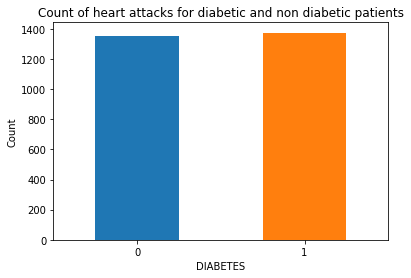

In [33]:
df[df['AMI_FLAG']==1].groupby('DIABETES').count()['ID'].plot.bar()
plt.ylabel("Count")
plt.title("Count of heart attacks for diabetic and non diabetic patients")
plt.xticks(rotation=0)

Text(0.5,1,'Members with AMI cases for different number of visits for Coronary Artery Disease')

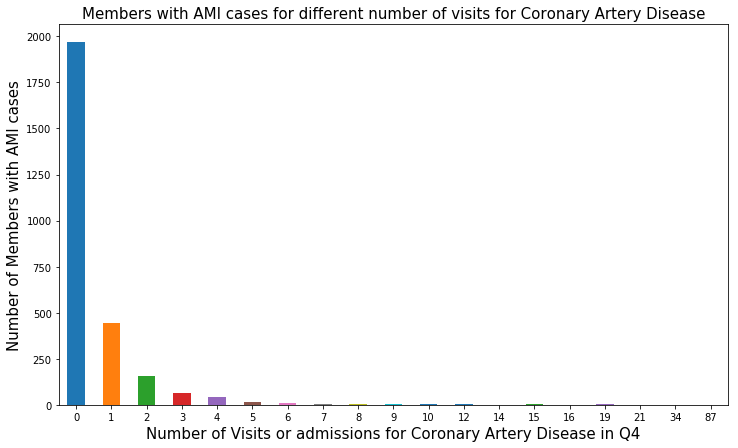

In [34]:
fig,ax=plt.subplots()
df[df['AMI_FLAG']==1].groupby(['CON_VISIT_33_Q04']).count()['ID'].plot(kind='bar',figsize=(12,7))
#df[df['AMI_FLAG']==1].groupby(['CON_VISIT_01_Q02']).count()['ID'].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("Number of Members with AMI cases",fontsize=15)
plt.xlabel("Number of Visits or admissions for Coronary Artery Disease in Q4",fontsize=15)
plt.title("Members with AMI cases for different number of visits for Coronary Artery Disease",fontsize=15)
#plt.savefig('C:\\Users\\gandh\\Downloads\\Datasets\\humana\\graphs\\CON_VISIT_01_Q04.png')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

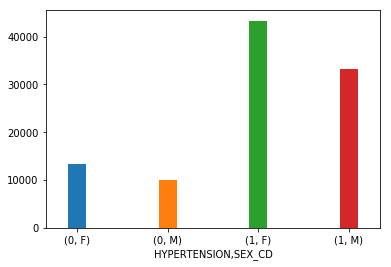

In [35]:
df.groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar(width=0.2)
plt.xticks(rotation=0)

Text(0,0.5,'Number of members')

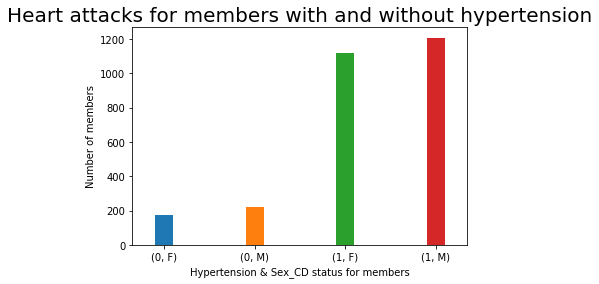

In [36]:
df[df['AMI_FLAG']==1].groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar(width=0.2)
plt.xticks(rotation=0)
plt.title("Heart attacks for members with and without hypertension",fontsize=20)
plt.xlabel("Hypertension & Sex_CD status for members",fontsize=10)
plt.ylabel("Number of members",fontsize=10)

In [37]:
t=df.groupby(['Education_level','SEX_CD']).count()['ID']

Text(0.5,0,'Education Levels')

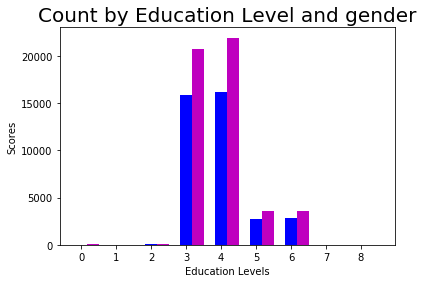

In [38]:
N=len(df.groupby('Education_level'))
men=[]
women=[]
for j in range(0,N):
    women.append(t.loc[j][0])
    try:
        men.append(t.loc[j][1])
        
    except:
        men.append(0)
men_means = tuple(men)
women_means = tuple(women)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1=ax.bar(ind,men_means,color='b',width=width)
rects2=ax.bar(ind+width,women_means,color='m',width=width)
#rects1 = ax.bar(ind, men_means, width, color='r')
plt.xticks(ind)
ax.set_ylabel('Scores',fontsize=10)
ax.set_title('Count by Education Level and gender',fontsize=20)
ax.set_xlabel("Education Levels")

In [39]:
df.columns[0:50]

Index(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT', 'DUAL', 'INSTITUTIONAL',
       'LIS', 'MCO_HLVL_PLAN_CD', 'MCO_PROD_TYPE_CD', 'CON_VISIT_04_Q01',
       'CON_VISIT_04_Q02', 'CON_VISIT_04_Q03', 'CON_VISIT_04_Q04',
       'CON_VISIT_21_Q01', 'CON_VISIT_21_Q02', 'CON_VISIT_21_Q03',
       'CON_VISIT_03_Q02', 'CON_VISIT_03_Q04', 'CON_VISIT_05_Q02',
       'CON_VISIT_05_Q04', 'CON_VISIT_09_Q02', 'CON_VISIT_10_Q02',
       'CON_VISIT_18_Q02', 'CON_VISIT_19_Q04', 'CON_VISIT_23_Q02',
       'CON_VISIT_24_Q02', 'CON_VISIT_30_Q01', 'CON_VISIT_30_Q02',
       'CON_VISIT_30_Q04', 'CON_VISIT_32_Q02', 'CON_VISIT_33_Q04',
       'CON_VISIT_06_Q01', 'CON_VISIT_06_Q02', 'CON_VISIT_06_Q03',
       'CON_VISIT_10_Q01', 'CON_VISIT_19_Q03', 'CON_VISIT_33_Q02',
       'CON_VISIT_08_Q02', 'CON_VISIT_10_Q03', 'CON_VISIT_10_Q04',
       'CON_VISIT_24_Q04', 'CON_VISIT_08_Q01', 'CON_

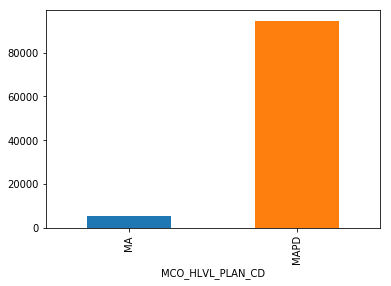

In [40]:
df.groupby('MCO_HLVL_PLAN_CD').count()['ID'].plot.bar()

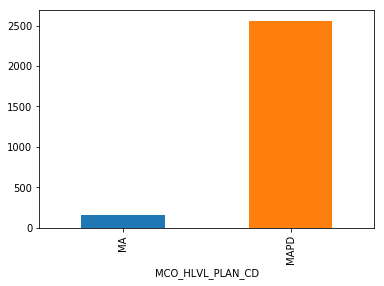

In [41]:
df[df['AMI_FLAG']==1].groupby('MCO_HLVL_PLAN_CD').count()['ID'].plot.bar()

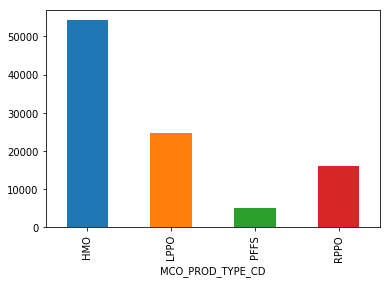

In [42]:
df.groupby('MCO_PROD_TYPE_CD').count()['ID'].plot.bar()

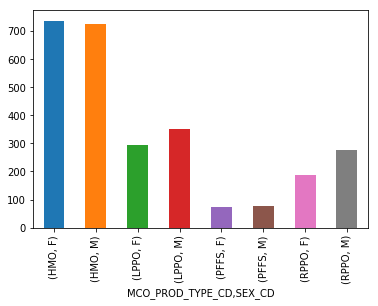

In [43]:
df[df['AMI_FLAG']==1].groupby(['MCO_PROD_TYPE_CD','SEX_CD']).count()['ID'].plot.bar()

In [44]:
#df[df['AMI_FLAG']==1].count() #2726

In [45]:
df[['RECON_MA_RISK_SCORE_NBR','RECON_RX_RISK_SCORE_NBR']].corr()

,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR
RECON_MA_RISK_SCORE_NBR,1.00000,0.52947
RECON_RX_RISK_SCORE_NBR,0.52947,1.00000


In [46]:
df[['CON_VISIT_01_Q01','CON_VISIT_01_Q02','CON_VISIT_01_Q03','CON_VISIT_01_Q04']].corr()

,CON_VISIT_01_Q01,CON_VISIT_01_Q02,CON_VISIT_01_Q03,CON_VISIT_01_Q04
CON_VISIT_01_Q01,1.000000,0.249303,0.126962,0.113894
CON_VISIT_01_Q02,0.249303,1.000000,0.320167,0.143733
CON_VISIT_01_Q03,0.126962,0.320167,1.000000,0.264533
CON_VISIT_01_Q04,0.113894,0.143733,0.264533,1.000000


In [47]:
df.columns

Index(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT',
       ...
       'COL', 'COL_GAP', 'AMM', 'AMM_GAP', 'DIAB_PASS', 'ACE_PASS',
       'STATIN_PASS', 'ACE_ELIG', 'DIAB_ELIG', 'STATIN_ELIG'],
      dtype='object', length=448)

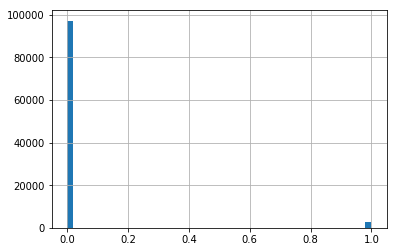

In [48]:
df['AMI_FLAG'].hist(bins=50)

In [49]:
df.loc[:, df.isna().any()]

,SEX_CD,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,PCP_ASSIGNMENT,DUAL,INSTITUTIONAL,LIS,MCO_HLVL_PLAN_CD,MCO_PROD_TYPE_CD,...,Pct_above_poverty_line,Pct_below_poverty_line,Decile_struggle_Med_lang,Home_value,Est_Net_worth,Est_income,Index_Health_ins_engage,Index_Health_ins_influence,Population_density_centile_ST,Population_density_centile_US
0,F,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,LPPO,...,94.0,6.0,5.0,127.0,87500.0,87500.0,3.0,2.0,70.0,84.0
1,F,N,N,1.0,ATTRIBUTED,N,N,N,MAPD,PFFS,...,86.0,14.0,NaN,128.0,-2500.0,7500.0,1.0,4.0,83.0,86.0
2,F,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,HMO,...,95.0,5.0,5.0,359.0,625000.0,112000.0,1.0,9.0,30.0,30.0
3,M,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,HMO,...,90.0,10.0,7.0,280.0,-2500.0,55000.0,2.0,4.0,16.0,18.0
4,F,N,N,1.0,MEMBER SELECTED,Y,N,Y,MAPD,HMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,PFFS,...,87.0,13.0,6.0,62.0,87500.0,55000.0,0.0,0.0,28.0,38.0
6,F,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,HMO,...,99.0,1.0,NaN,138.0,15000.0,87500.0,6.0,2.0,14.0,33.0
7,M,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,HMO,...,95.0,5.0,4.0,0.0,200000.0,35000.0,4.0,4.0,87.0,76.0
8,M,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,LPPO,...,79.0,21.0,7.0,180.0,125000.0,55000.0,4.0,4.0,79.0,86.0
9,M,N,N,0.0,MEMBER SELECTED,N,N,N,MAPD,HMO,...,92.0,8.0,NaN,112.0,15000.0,67500.0,2.0,1.0,78.0,85.0


In [50]:
#Treating null/missing values from the datset
df.dropna(axis=0,subset=['SEX_CD'],inplace=True)

df['DUAL'].dropna(axis=0,inplace=True)

df.dropna(axis=0,subset=['ESRD_IND'],inplace=True)

df.dropna(axis=0,subset=['HOSPICE_IND'],how='any',inplace=True)

df.dropna(axis=0,subset=['ORIG_REAS_ENTITLE_CD'],inplace=True)

df.dropna(axis=0,subset=['PCP_ASSIGNMENT'],inplace=True)

df.dropna(axis=0,subset=['DUAL'],inplace=True)

df.dropna(axis=0,subset=['INSTITUTIONAL'],inplace=True)

df.dropna(axis=0,subset=['LIS'],inplace=True)

df.dropna(axis=0,subset=['MCO_HLVL_PLAN_CD'],inplace=True)

df.dropna(axis=0,subset=['MCO_PROD_TYPE_CD'],inplace=True)

df.drop(axis=1,columns=['Diab_Type'],inplace=True)

df.drop(axis=1,columns=['Dwelling_Type'],inplace=True)

df.dropna(axis=0,subset=['Education_level'],inplace=True)

df.dropna(axis=0,subset=['Length_residence'],inplace=True)

df.dropna(axis=0,subset=['Est_BMI_decile'],inplace=True)

df.dropna(axis=0,subset=['Num_person_household'],inplace=True)

df.dropna(axis=0,subset=['College'],inplace=True)

df.dropna(axis=0,subset=['Online_purchaser'],inplace=True)

df.dropna(axis=0,subset=['Online_User'],inplace=True)


df.dropna(axis=0,subset=['Pct_above_poverty_line'],inplace=True)


df.dropna(axis=0,subset=['Pct_below_poverty_line'],inplace=True)

df.dropna(axis=0,subset=['Decile_struggle_Med_lang'],inplace=True)

df.dropna(axis=0,subset=['Home_value'],inplace=True)

df.dropna(axis=0,subset=['Est_Net_worth'],inplace=True)

df.dropna(axis=0,subset=['Est_income'],inplace=True)

df.dropna(axis=0,subset=['Index_Health_ins_engage'],inplace=True)

df.dropna(axis=0,subset=['Index_Health_ins_influence'],inplace=True)

df.dropna(axis=0,subset=['Population_density_centile_ST'],inplace=True)

df.dropna(axis=0,subset=['Population_density_centile_US'],inplace=True)

In [51]:
#List of columns that have only one value
singlevaluedcol=[]
for col in df.columns:
    if int(df[col].nunique())>1:
        continue
    else:
        singlevaluedcol.append(col)
        

In [52]:
singlevaluedcol

['POT_VISIT_02_Q04',
 'POT_VISIT_54_Q04',
 'POT_VISIT_34_Q02',
 'POT_VISIT_34_Q03',
 'POT_VISIT_02_Q01',
 'POT_VISIT_07_Q01',
 'POT_VISIT_07_Q02',
 'POT_VISIT_07_Q03',
 'POT_VISIT_07_Q04',
 'POT_VISIT_18_Q01',
 'POT_VISIT_54_Q01',
 'POT_VISIT_54_Q02',
 'POT_VISIT_54_Q03']

In [53]:
l=df.columns[df.isna().any()].tolist()

In [54]:
#k=['POT_VISIT_02_Q04','POT_VISIT_54_Q04','POT_VISIT_34_Q02','POT_VISIT_34_Q03','POT_VISIT_02_Q01','POT_VISIT_07_Q01','POT_VISIT_07_Q02','POT_VISIT_07_Q03','POT_VISIT_07_Q04','POT_VISIT_18_Q01','POT_VISIT_54_Q01','POT_VISIT_54_Q02','POT_VISIT_54_Q03']

In [55]:
df.drop(columns=singlevaluedcol,inplace=True)

In [56]:
#df.select_dtypes(include='object').columns

In [57]:
#df=pd.get_dummies(df)

In [58]:
#Tranforming continuous columns "CON_VISIT_0XXXX" into categorical levels
#for i in range(1,34):
#    try:    
#        if i<10:
#            s='CON_VISIT_0' + str(i)+'_Q0'
#            for j in range(1,5):
#                col=s+str(j)
#                #print(col)
#                df.loc[df[col]>1,col]=2
#                df[col]=df[col].astype('object')
#        else:
#            s='CON_VISIT_' + str(i)+'_Q0'
#            for j in range(1,5):
#                col=s+str(j)
#                #print(col)
#                df.loc[df[col]>1,col]=2
#               df[col]=df[col].astype('object')
#    except:
#        continue


In [59]:
#df['CON_VISIT_01']=df['CON_VISIT_01_Q01']+df['CON_VISIT_01_Q02']+df['CON_VISIT_01_Q03']+df['CON_VISIT_01_Q04']

In [60]:
#colnames=[]
#for i in range(1,34):
#    if i <10:
#        s='CON_VISIT_0' + str(i)
#        colnames.append(s)
#        df[s]=0
#        t=s+'_Q0'
#        for j in range(1,5):
#            try:
#                col1=t+str(j)
#                df[s]=df[s]+df[col1]
#                df.drop(axis=1,columns=col1,inplace=True)
#            except:
#                continue
#    else:
#        s='CON_VISIT_' + str(i)
#        colnames.append(s)
#        df[s]=0
#        t=s+'_Q0'
#        for j in range(1,5):
#            try:
#                col1=t+str(j)
#                df[s]=df[s]+df[col1]
#                df.drop(axis=1,columns=col1,inplace=True)
#            except:
#                continue

In [61]:
#df.drop(axis=1,columns='CON_VISIT_29',inplace=True)

In [62]:
#colnames=[]
#for i in range(1,100):
#    if i <10:
#        s='POT_VISIT_0' + str(i)
#        colnames.append(s)
#        df[s]=0
#        t=s+'_Q0'
#        for j in range(1,5):
#            try:
#                col1=t+str(j)
#                df[s]=df[s]+df[col1]
#                df.drop(axis=1,columns=col1,inplace=True)
#            except:
#                continue
#    else:
#        s='POT_VISIT_' + str(i)
##        colnames.append(s)
 #       df[s]=0
#        t=s+'_Q0'
#        for j in range(1,5):
#            try:
#                col1=t+str(j)
#                df[s]=df[s]+df[col1]
#                df.drop(axis=1,columns=col1,inplace=True)
#            except:
#                continue

In [63]:
#filter_col = [col for col in df if col.startswith('POT_VISIT')]

In [64]:
df.get_dtype_counts()

int64      404
object       9
float64     20
dtype: int64

In [65]:
df.shape

(74670, 433)

In [66]:
#df=pd.get_dummies(df)

In [67]:
df.head()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0
2,3,75,F,0,N,N,0.0,0.638,0.568,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
3,4,68,M,0,N,N,0.0,0.584,0.886,MEMBER SELECTED,...,1,1,0,0,1,1,1,1,1,1
5,6,72,F,0,N,N,0.0,0.912,1.409,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
7,8,69,M,0,N,N,0.0,0.284,0.336,MEMBER SELECTED,...,1,0,0,0,0,0,0,0,0,0


In [68]:
#df[df.select_dtypes(include='int64').columns[19]].hist(bins=50)

In [69]:
df.select_dtypes(include='float64').columns

Index(['ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'Education_level', 'Length_residence',
       'Est_BMI_decile', 'Num_person_household', 'College', 'Online_purchaser',
       'Online_User', 'Pct_above_poverty_line', 'Pct_below_poverty_line',
       'Decile_struggle_Med_lang', 'Home_value', 'Est_Net_worth', 'Est_income',
       'Index_Health_ins_engage', 'Index_Health_ins_influence',
       'Population_density_centile_ST', 'Population_density_centile_US'],
      dtype='object')

In [70]:
df['ORIG_REAS_ENTITLE_CD']=df['ORIG_REAS_ENTITLE_CD'].astype('object')
df['Education_level']=df['Education_level'].astype('object')
df['Est_BMI_decile']=df['Est_BMI_decile'].astype('object')
df['College']=df['College'].astype('int64')
df['Online_purchaser']=df['Online_purchaser'].astype('int64')
df['Online_User']=df['Online_User'].astype('int64')
df['Decile_struggle_Med_lang']=df['Decile_struggle_Med_lang'].astype('object')
df['Index_Health_ins_engage']=df['Index_Health_ins_engage'].astype('object')
df['Index_Health_ins_influence']=df['Index_Health_ins_influence'].astype('object')

In [71]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

In [72]:
#Min Max Scaling
for col in df.select_dtypes(include='int64').columns:
    if col in ['ID','AMI_FLAG']:
        continue
    else:
        min_value=np.min(df[col])
        max_value=np.max(df[col])
        df[col]=(df[col]-min_value)/(max_value-min_value)
    

In [73]:
for col in df.select_dtypes(include='float64').columns:
    min_value=np.min(df[col])
    max_value=np.max(df[col])
    df[col]=(df[col]-min_value)/(max_value-min_value)
    

In [74]:
#df4=df.copy()

In [75]:
df=pd.get_dummies(df)
t=list(df.columns)
tmp=df.columns[df.columns.get_loc('AMI_FLAG')]
t.append(tmp)
del t[df.columns.get_loc('AMI_FLAG')]
df=df[t]
X=df.iloc[:,1:len(df.columns)-1]
y=df.iloc[:,-1]
print(X.shape,y.shape)
X1,X_test,y1,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

(74670, 490) (74670,)


In [76]:
df['AMI_FLAG'].value_counts()[1]/(df['AMI_FLAG'].value_counts()[0]+df['AMI_FLAG'].value_counts()[1])

0.02663720369626356

In [77]:
df.get_dtype_counts()

int64        2
float64    416
uint8       74
dtype: int64

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(penalty="l2",loss='log')
clf.fit(X1, y1)
predictions=clf.predict(X_test)
confusion_matrix(y_test,predictions)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([[14543,     0],
       [  391,     0]], dtype=int64)

In [80]:
#maxdict={}
#mindict={}
#for col in df.select_dtypes(include='float64').columns:
#    maxdict[col]=np.max(df[col])
#    mindict[col]=np.min(df[col])

In [81]:
#maxdict

In [82]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [83]:
precision_score(y_test,predictions)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [84]:
recall_score(y_test,predictions)

0.0

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
#from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(return_indices=True)
#X_rus, y_rus, id_rus = rus.fit_sample(X, y)

In [87]:
#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler()
#X_ros, y_ros = ros.fit_sample(X, y)


In [88]:
#Random Over sampling using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X1, y1 = sm.fit_sample(X1, y1)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [89]:
X_train,X_val,y_train,y_val=train_test_split(X1,y1,test_size=0.1,random_state=42)

In [90]:
X_test.shape

(14934, 490)

In [91]:
#df_oversample_features=pd.DataFrame(data=X_ros,columns=X.columns)

In [92]:
#df_oversample_target=pd.DataFrame(data=y_ros,columns=['AMI_FLAG'])

In [93]:
#X_train,X_test,y_train,y_test=train_test_split(X_ros,y_ros,test_size=0.2,random_state=42)

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [95]:
gb=GradientBoostingClassifier()

In [96]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [97]:
predictions=gb.predict_proba(X_val)

In [98]:
threshold=0.5
preds=[]
for i in range(0,len(predictions)):
    if predictions[i][1]<threshold:
        preds.append(0)
    else:
        preds.append(1)

In [99]:
#predictions=gb.predict(X_val)

In [105]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,preds))

Confusion Matrix on Validation set predictions: 
 [[5975    2]
 [ 176 5475]]


In [106]:
print("precision on validation set : ",precision_score(y_val,gb.predict(X_val)))
print("Recall on validation set: ", recall_score(y_val,gb.predict(X_val)))
print("Accuracy on validation set : ",accuracy_score(y_val,gb.predict(X_val)))
print("precision on test set : ",precision_score(y_test,gb.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,gb.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,gb.predict(X_test)))
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_test,gb.predict(X_test)))


precision on validation set :  0.9996348365893738
Recall on validation set:  0.968855069899133
Accuracy on validation set :  0.9846921224630203
precision on test set :  0.0
Recall on test set:  0.0
Accuracy on test :  0.9736172492299451
Confusion Matrix on Validation set predictions: 
 [[14540     3]
 [  391     0]]


In [107]:
predictions=gb.predict_proba(X_test)
preds=[]
for i in range(0,len(predictions)):
    if predictions[i][1]<0.19:
        preds.append(0)
    else:
        preds.append(1)


In [108]:
print("Confusion Matrix on test set predictions: "+"\n",confusion_matrix(y_test,preds))
print("precision on test set : ",precision_score(y_test,preds))
print("Recall on test set: ", recall_score(y_test,preds))
print("Accuracy on test set : ",accuracy_score(y_test,preds))

Confusion Matrix on test set predictions: 
 [[13513  1030]
 [  291   100]]
precision on test set :  0.08849557522123894
Recall on test set:  0.2557544757033248
Accuracy on test set :  0.9115441274943082


In [109]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
#sns.set(color_codes=True)
from sklearn.tree import DecisionTreeClassifier

In [111]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf_tree=DecisionTreeClassifier(max_depth=15)

clf_tree.fit(X_train,y_train)

#predictions=clf_tree.predict(X_val)

#print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,predictions))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
predictions=clf_tree.predict_proba(X_test)

preds=[]
for i in range(0,len(predictions)):
    if predictions[i][1]<0.19:
        preds.append(0)
    else:
        preds.append(1)

In [113]:
print("Confusion Matrix on test set predictions: "+"\n",confusion_matrix(y_test,preds))
print("precision on test set : ",precision_score(y_test,preds))
print("Recall on test set: ", recall_score(y_test,preds))
print("Accuracy on test set : ",accuracy_score(y_test,preds))

Confusion Matrix on test set predictions: 
 [[13842   701]
 [  357    34]]
precision on test set :  0.04625850340136054
Recall on test set:  0.08695652173913043
Accuracy on test set :  0.9291549484398018


In [114]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,clf_tree.predict(X_val)))
print("precision on validation set : ",precision_score(y_val,clf_tree.predict(X_val)))
print("Recall on validation set: ", recall_score(y_val,clf_tree.predict(X_val)))
print("Accuracy on validation set : ",accuracy_score(y_val,clf_tree.predict(X_val)))
print("precision on test set : ",precision_score(y_test,clf_tree.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,clf_tree.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,clf_tree.predict(X_test)))

Confusion Matrix on Validation set predictions: 
 [[5759  218]
 [ 248 5403]]
precision on validation set :  0.9612168653264543
Recall on validation set:  0.9561139621305964
Accuracy on validation set :  0.9599243206054352
precision on test set :  0.05252918287937743
Recall on test set:  0.06905370843989769
Accuracy on test :  0.9430159367885362


In [115]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions=gnb.predict_proba(X_test)

In [116]:
predictions=gnb.predict_proba(X_test)

preds=[]
for i in range(0,len(predictions)):
    if predictions[i][1]<0.9:
        preds.append(0)
    else:
        preds.append(1)

In [117]:
print("Confusion Matrix on test set predictions: "+"\n",confusion_matrix(y_test,preds))
print("precision on test set : ",precision_score(y_test,preds))
print("Recall on test set: ", recall_score(y_test,preds))
print("Accuracy on test set : ",accuracy_score(y_test,preds))

Confusion Matrix on test set predictions: 
 [[  798 13745]
 [   32   359]]
precision on test set :  0.02545377197958026
Recall on test set:  0.9181585677749361
Accuracy on test set :  0.07747421990089728


In [118]:
logreg=LogisticRegression()

In [119]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
predictions=logreg.predict_proba(X_test)

In [121]:
preds=[]
for i in range(0,len(predictions)):
    if predictions[i][1]<0.59:
        preds.append(0)
    else:
        preds.append(1)

In [122]:
print("Confusion Matrix on test set predictions: "+"\n",confusion_matrix(y_test,preds))
print("precision on test set : ",precision_score(y_test,preds))
print("Recall on test set: ", recall_score(y_test,preds))
print("Accuracy on test set : ",accuracy_score(y_test,preds))

Confusion Matrix on test set predictions: 
 [[11871  2672]
 [  195   196]]
precision on test set :  0.06834030683403068
Recall on test set:  0.5012787723785166
Accuracy on test set :  0.8080219633052096


In [123]:
from sklearn.metrics import roc_auc_score

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [125]:
predictions=lda.predict_proba(X_test)

In [126]:
preds=[]
for i in range(0,len(predictions)):
    if predictions[i][1]<0.55:
        preds.append(0)
    else:
        preds.append(1)

In [127]:
print("Confusion Matrix on test set predictions: "+"\n",confusion_matrix(y_test,preds))
print("precision on test set : ",precision_score(y_test,preds))
print("Recall on test set: ", recall_score(y_test,preds))
print("Accuracy on test set : ",accuracy_score(y_test,preds))

Confusion Matrix on test set predictions: 
 [[11360  3183]
 [  186   205]]
precision on test set :  0.06050767414403778
Recall on test set:  0.5242966751918159
Accuracy on test set :  0.7744073925271193


In [128]:
#print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,predictions))

In [129]:
print("precision on validation set : ",precision_score(y_val,lda.predict(X_val)))
print("Recall on validation set: ", recall_score(y_val,lda.predict(X_val)))
print("Accuracy on validation set : ",accuracy_score(y_val,lda.predict(X_val)))
print("precision on test set : ",precision_score(y_test,lda.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,lda.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,lda.predict(X_test)))

precision on validation set :  0.7162090345438441
Recall on validation set:  0.7154485931693506
Accuracy on validation set :  0.7239422084623323
precision on test set :  0.054504728720756596
Recall on test set:  0.5601023017902813
Accuracy on test :  0.7340966921119593


In [130]:
#df.select_dtypes(include='int64').columns

In [131]:
#Work on Gaussian Naive bayes and Linear Discriminant analysis to improve precision and recall score

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
clf_rf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=0)

In [134]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [135]:
predictions=clf_rf.predict_proba(X_test)

In [136]:
preds=[]
for i in range(0,len(predictions)):
    if predictions[i][1]<0.35:
        preds.append(0)
    else:
        preds.append(1)

In [137]:
print("Confusion Matrix on test set predictions: "+"\n",confusion_matrix(y_test,preds))
print("precision on test set : ",precision_score(y_test,preds))
print("Recall on test set: ", recall_score(y_test,preds))
print("Accuracy on test set : ",accuracy_score(y_test,preds))

Confusion Matrix on test set predictions: 
 [[12225  2318]
 [  208   183]]
precision on test set :  0.07317073170731707
Recall on test set:  0.4680306905370844
Accuracy on test set :  0.8308557653676175


In [138]:
#print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,predictions))

In [139]:
print("precision on validation set : ",precision_score(y_val,clf_rf.predict(X_val)))
print("Recall on validation set: ", recall_score(y_val,clf_rf.predict(X_val)))
print("Accuracy on validation set : ",accuracy_score(y_val,clf_rf.predict(X_val)))
print("precision on test set : ",precision_score(y_test,clf_rf.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,clf_rf.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,clf_rf.predict(X_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(y_test,clf_rf.predict(X_test)))

precision on validation set :  0.9745670995670995
Recall on validation set:  0.9561139621305964
Accuracy on validation set :  0.966546267629859
precision on test set :  0.10852713178294573
Recall on test set:  0.10741687979539642
Accuracy on test :  0.9535288603187357
Confusion Matrix on Test set predictions: 
 [[14198   345]
 [  349    42]]


In [140]:
estimator=clf_rf.estimators_[1]

In [141]:
import pydotplus
import six
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in clf_rf.estimators_:
    if (i_tree <1):        
        tree.export_graphviz(tree_in_forest, out_file=dotfile)
        pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
        i_tree = i_tree + 1

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.597219 to fit



In [142]:
dt=DecisionTreeClassifier(max_depth=8)

In [143]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [144]:
#from sklearn.metrics import precision_recall_curve

In [145]:
#y_scores=rf.predict_proba(X_test)[:,1]

In [146]:
predictions=dt.predict(X_val)

In [147]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,predictions))
print("precision on validation set : ",precision_score(y_val,predictions))
print("Recall on validation set: ", recall_score(y_val,predictions))
print("Accuracy on validation set : ",accuracy_score(y_val,predictions))
print("precision on test set : ",precision_score(y_test,dt.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,dt.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,dt.predict(X_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(y_test,dt.predict(X_test)))

Confusion Matrix on Validation set predictions: 
 [[5526  451]
 [ 823 4828]]
precision on validation set :  0.9145671528698617
Recall on validation set:  0.8543620598124225
Accuracy on validation set :  0.8904368765049879
precision on test set :  0.06260162601626017
Recall on test set:  0.1969309462915601
Accuracy on test :  0.9017677782241864
Confusion Matrix on Test set predictions: 
 [[13390  1153]
 [  314    77]]


In [148]:
from sklearn.ensemble import AdaBoostClassifier


In [149]:
clf = AdaBoostClassifier(n_estimators=120)

In [150]:
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=120, random_state=None)

In [151]:
predictions=clf.predict_proba(X_test)

In [152]:
preds=[]
for i in range(0,len(predictions)):
    if predictions[i][1]<0.51:
        preds.append(0)
    else:
        preds.append(1)

In [153]:
print("Confusion Matrix on test set predictions: "+"\n",confusion_matrix(y_test,preds))
print("precision on test set : ",precision_score(y_test,preds))
print("Recall on test set: ", recall_score(y_test,preds))
print("Accuracy on test set : ",accuracy_score(y_test,preds))

Confusion Matrix on test set predictions: 
 [[14543     0]
 [  391     0]]
precision on test set :  0.0
Recall on test set:  0.0
Accuracy on test set :  0.9738181331190572


C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [154]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,clf.predict(X_val)))
print("precision on validation set : ",precision_score(y_val,clf.predict(X_val)))
print("Recall on validation set: ", recall_score(y_val,clf.predict(X_val)))
print("Accuracy on validation set : ",accuracy_score(y_val,clf.predict(X_val)))
print("precision on test set : ",precision_score(y_test,clf.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,clf.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,clf.predict(X_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(y_test,clf.predict(X_test)))

Confusion Matrix on Validation set predictions: 
 [[5956   21]
 [ 217 5434]]
precision on validation set :  0.9961503208065995
Recall on validation set:  0.9615997168642718
Accuracy on validation set :  0.97953216374269
precision on test set :  0.09859154929577464
Recall on test set:  0.017902813299232736
Accuracy on test :  0.9700013392259275
Confusion Matrix on Test set predictions: 
 [[14479    64]
 [  384     7]]


In [155]:
from sklearn.ensemble import BaggingClassifier

In [156]:
from sklearn.ensemble import ExtraTreesClassifier

In [157]:
clf_extratrees=ExtraTreesClassifier(max_depth=8)

In [158]:
clf_extratrees.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=8, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [159]:
predictions=clf_extratrees.predict(X_val)

In [160]:
#confusion_matrix(y_test,predictions)

In [161]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,predictions))
print("precision on validation set : ",precision_score(y_val,predictions))
print("Recall on validation set: ", recall_score(y_val,predictions))
print("Accuracy on validation set : ",accuracy_score(y_val,predictions))
print("precision on test set : ",precision_score(y_test,clf_extratrees.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,clf_extratrees.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,clf_extratrees.predict(X_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(y_test,clf_extratrees.predict(X_test)))

Confusion Matrix on Validation set predictions: 
 [[4896 1081]
 [1198 4453]]
precision on validation set :  0.8046620889049512
Recall on validation set:  0.7880021235179614
Accuracy on validation set :  0.8040075679394565
precision on test set :  0.06192170818505338
Recall on test set:  0.44501278772378516
Accuracy on test :  0.8089594214543994
Confusion Matrix on Test set predictions: 
 [[11907  2636]
 [  217   174]]


In [162]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [164]:
# Training classifiers
clf1 =LogisticRegression()
#clf2 = KNeighborsClassifier(n_neighbors=7)
clf2=RandomForestClassifier(n_estimators=50,max_depth=20)
clf3 =DecisionTreeClassifier(max_depth=10)
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
                                    ('dt', clf3)],
                        voting='soft', weights=[1, 1, 1])

In [165]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
eclf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[1, 1, 1])

In [168]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [169]:
preds1=clf1.predict(X_val)
preds2=clf2.predict(X_val)
preds3=clf3.predict(X_val)
preds4=eclf.predict(X_val)

In [170]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,preds4))
print("precision on validation set : ",precision_score(y_val,preds4))
print("Recall on validation set: ", recall_score(y_val,preds4))
print("Accuracy on validation set : ",accuracy_score(y_val,preds4))
print("precision on test set : ",precision_score(y_test,eclf.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,eclf.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,eclf.predict(X_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(y_test,eclf.predict(X_test)))

Confusion Matrix on Validation set predictions: 
 [[5804  173]
 [ 243 5408]]
precision on validation set :  0.9690019709729439
Recall on validation set:  0.9569987612811892
Accuracy on validation set :  0.9642242862057103
precision on test set :  0.0859538784067086
Recall on test set:  0.10485933503836317
Accuracy on test :  0.9473684210526315
Confusion Matrix on Test set predictions: 
 [[14107   436]
 [  350    41]]


In [171]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,preds3))
print("precision on validation set : ",precision_score(y_val,preds3))
print("Recall on validation set: ", recall_score(y_val,preds3))
print("Accuracy on validation set : ",accuracy_score(y_val,preds3))
print("precision on test set : ",precision_score(y_test,clf3.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,clf3.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,clf3.predict(X_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(y_test,clf3.predict(X_test)))

Confusion Matrix on Validation set predictions: 
 [[5680  297]
 [ 590 5061]]
precision on validation set :  0.944568868980963
Recall on validation set:  0.8955937002300478
Accuracy on validation set :  0.923718610251118
precision on test set :  0.06060606060606061
Recall on test set:  0.11764705882352941
Accuracy on test :  0.9291549484398018
Confusion Matrix on Test set predictions: 
 [[13830   713]
 [  345    46]]


In [172]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,preds2))
print("precision on validation set : ",precision_score(y_val,preds2))
print("Recall on validation set: ", recall_score(y_val,preds2))
print("Accuracy on validation set : ",accuracy_score(y_val,preds2))
print("precision on test set : ",precision_score(y_test,clf2.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,clf2.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,clf2.predict(X_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(y_test,clf2.predict(X_test)))

Confusion Matrix on Validation set predictions: 
 [[5975    2]
 [ 138 5513]]
precision on validation set :  0.999637352674524
Recall on validation set:  0.9755795434436383
Accuracy on validation set :  0.9879600963192294
precision on test set :  0.0
Recall on test set:  0.0
Accuracy on test :  0.9734833266372037
Confusion Matrix on Test set predictions: 
 [[14538     5]
 [  391     0]]


In [173]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(y_val,preds1))
print("precision on validation set : ",precision_score(y_val,preds1))
print("Recall on validation set: ", recall_score(y_val,preds1))
print("Accuracy on validation set : ",accuracy_score(y_val,preds1))
print("precision on test set : ",precision_score(y_test,clf1.predict(X_test)))
print("Recall on test set: ", recall_score(y_test,clf1.predict(X_test)))
print("Accuracy on test : ",accuracy_score(y_test,clf1.predict(X_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(y_test,clf1.predict(X_test)))

Confusion Matrix on Validation set predictions: 
 [[4381 1596]
 [1602 4049]]
precision on validation set :  0.7172719220549159
Recall on validation set:  0.716510352150062
Accuracy on validation set :  0.7249742002063984
precision on test set :  0.05382367267413541
Recall on test set:  0.5652173913043478
Accuracy on test :  0.7284719432168206
Confusion Matrix on Test set predictions: 
 [[10658  3885]
 [  170   221]]


In [174]:
#Finalize LDA and  Logistic Regression

In [175]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 300,verbose=True)
X=df.iloc[:,1:len(df.columns)-1]
y=df.iloc[:,-1]
print(X.shape,y.shape)
X1,X_test,y1,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X1,y1,test_size=0.2,random_state=44)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

(74670, 490) (74670,)
Fitting estimator with 490 features.
Fitting estimator with 489 features.
Fitting estimator with 488 features.
Fitting estimator with 487 features.
Fitting estimator with 486 features.
Fitting estimator with 485 features.
Fitting estimator with 484 features.
Fitting estimator with 483 features.
Fitting estimator with 482 features.
Fitting estimator with 481 features.
Fitting estimator with 480 features.
Fitting estimator with 479 features.
Fitting estimator with 478 features.
Fitting estimator with 477 features.
Fitting estimator with 476 features.
Fitting estimator with 475 features.
Fitting estimator with 474 features.
Fitting estimator with 473 features.
Fitting estimator with 472 features.
Fitting estimator with 471 features.
Fitting estimator with 470 features.
Fitting estimator with 469 features.
Fitting estimator with 468 features.
Fitting estimator with 467 features.
Fitting estimator with 466 features.
Fitting estimator with 465 features.
Fitting estimato

In [274]:
#import statsmodels.api as sm
#logit_model=sm.Logit(y_train,X_train)
#result=logit_model.fit()
#print(result.summary2())

In [176]:
#print(rfe.support_)

In [177]:
k=rfe.ranking_

In [178]:
len(k[k==1])

300

In [179]:
k=list(k)

In [180]:
count=[]
for i in range(0,len(k)):
    if k[i]==1:
        count.append(i+1)
    else:
        continue
    

In [181]:
df.iloc[:,count].columns

Index(['AGE', 'RECON_MA_RISK_SCORE_NBR', 'RECON_RX_RISK_SCORE_NBR',
       'CON_VISIT_04_Q01', 'CON_VISIT_04_Q02', 'CON_VISIT_04_Q03',
       'CON_VISIT_04_Q04', 'CON_VISIT_21_Q01', 'CON_VISIT_21_Q02',
       'CON_VISIT_21_Q03',
       ...
       'Decile_struggle_Med_lang_2.0', 'Decile_struggle_Med_lang_3.0',
       'Decile_struggle_Med_lang_9.0', 'Index_Health_ins_engage_0.0',
       'Index_Health_ins_engage_1.0', 'Index_Health_ins_engage_7.0',
       'Index_Health_ins_engage_8.0', 'Index_Health_ins_influence_4.0',
       'Index_Health_ins_influence_8.0', 'Index_Health_ins_influence_9.0'],
      dtype='object', length=300)

In [182]:
#Over Sampling on new dataset with 300 features
a=df.iloc[:,count]
b=df.iloc[:,-1]
a1,a_test,b1,b_test=train_test_split(a,b,test_size=0.1,random_state=42)

sm = SMOTE(random_state=12, ratio = 1.0)
a1,b1 = sm.fit_sample(a1, b1)
a_train,a_val,b_train,b_val=train_test_split(a1,b1,test_size=0.1,random_state=42)


In [183]:
logreg.fit(a_train,b_train)
predictions=logreg.predict(a_val)

In [184]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(b_val,predictions))
print("precision on validation set : ",precision_score(b_val,predictions))
print("Recall on validation set: ", recall_score(b_val,predictions))
print("Accuracy on validation set : ",accuracy_score(b_val,predictions))
print("precision on test set : ",precision_score(b_test,logreg.predict(a_test)))
print("Recall on test set: ", recall_score(b_test,logreg.predict(a_test)))
print("Accuracy on test : ",accuracy_score(b_test,logreg.predict(a_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(b_test,logreg.predict(a_test)))

Confusion Matrix on Validation set predictions: 
 [[4839 1795]
 [1909 4539]]
precision on validation set :  0.716608778023366
Recall on validation set:  0.703939205955335
Accuracy on validation set :  0.7168628650053509
precision on test set :  0.055392156862745096
Recall on test set:  0.5854922279792746
Accuracy on test :  0.7312173563680193
Confusion Matrix on Test set predictions: 
 [[5347 1927]
 [  80  113]]


In [185]:
rf=RandomForestClassifier(max_depth=7,min_samples_split=10)

In [186]:
rf.fit(a_train,b_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [198]:
predictions=rf.predict(a_val)

In [199]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(b_val,predictions))
print("precision on validation set : ",precision_score(b_val,predictions))
print("Recall on validation set: ", recall_score(b_val,predictions))
print("Accuracy on validation set : ",accuracy_score(b_val,predictions))
print("precision on test set : ",precision_score(b_test,rf.predict(a_test)))
print("Recall on test set: ", recall_score(b_test,rf.predict(a_test)))
print("Accuracy on test : ",accuracy_score(b_test,rf.predict(a_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(b_test,rf.predict(a_test)))

Confusion Matrix on Validation set predictions: 
 [[5828  806]
 [ 919 5529]]
precision on validation set :  0.8727703235990529
Recall on validation set:  0.8574751861042184
Accuracy on validation set :  0.8681394282219844
precision on test set :  0.06907894736842106
Recall on test set:  0.32642487046632124
Accuracy on test :  0.8688897817061738
Confusion Matrix on Test set predictions: 
 [[6425  849]
 [ 130   63]]


In [189]:
lda=LinearDiscriminantAnalysis()

In [190]:
lda.fit(a_train,b_train)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [200]:
predictions=lda.predict(a_val)

In [201]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(b_val,predictions))
print("precision on validation set : ",precision_score(b_val,predictions))
print("Recall on validation set: ", recall_score(b_val,predictions))
print("Accuracy on validation set : ",accuracy_score(b_val,predictions))
print("precision on test set : ",precision_score(b_test,lda.predict(a_test)))
print("Recall on test set: ", recall_score(b_test,lda.predict(a_test)))
print("Accuracy on test : ",accuracy_score(b_test,lda.predict(a_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(b_test,lda.predict(a_test)))

Confusion Matrix on Validation set predictions: 
 [[4871 1763]
 [1910 4538]]
precision on validation set :  0.7202031423583558
Recall on validation set:  0.7037841191066998
Accuracy on validation set :  0.7192325332517964
precision on test set :  0.0554730064388311
Recall on test set:  0.5803108808290155
Accuracy on test :  0.7337618856301058
Confusion Matrix on Test set predictions: 
 [[5367 1907]
 [  81  112]]


In [193]:
dt=DecisionTreeClassifier(max_depth=10)

In [194]:
dt.fit(a_train,b_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [202]:
predictions=dt.predict(a_val)

In [203]:
print("Confusion Matrix on Validation set predictions: "+"\n",confusion_matrix(b_val,predictions))
print("precision on validation set : ",precision_score(b_val,predictions))
print("Recall on validation set: ", recall_score(b_val,predictions))
print("Accuracy on validation set : ",accuracy_score(b_val,predictions))
print("precision on test set : ",precision_score(b_test,dt.predict(a_test)))
print("Recall on test set: ", recall_score(b_test,dt.predict(a_test)))
print("Accuracy on test : ",accuracy_score(b_test,dt.predict(a_test)))
print("Confusion Matrix on Test set predictions: "+"\n",confusion_matrix(b_test,dt.predict(a_test)))

Confusion Matrix on Validation set predictions: 
 [[6324  310]
 [ 864 5584]]
precision on validation set :  0.9474041398031897
Recall on validation set:  0.8660049627791563
Accuracy on validation set :  0.9102583702797737
precision on test set :  0.07142857142857142
Recall on test set:  0.13471502590673576
Accuracy on test :  0.9323690906655953
Confusion Matrix on Test set predictions: 
 [[6936  338]
 [ 167   26]]


In [223]:
#Hyperparameter tuning using gridsearchCV